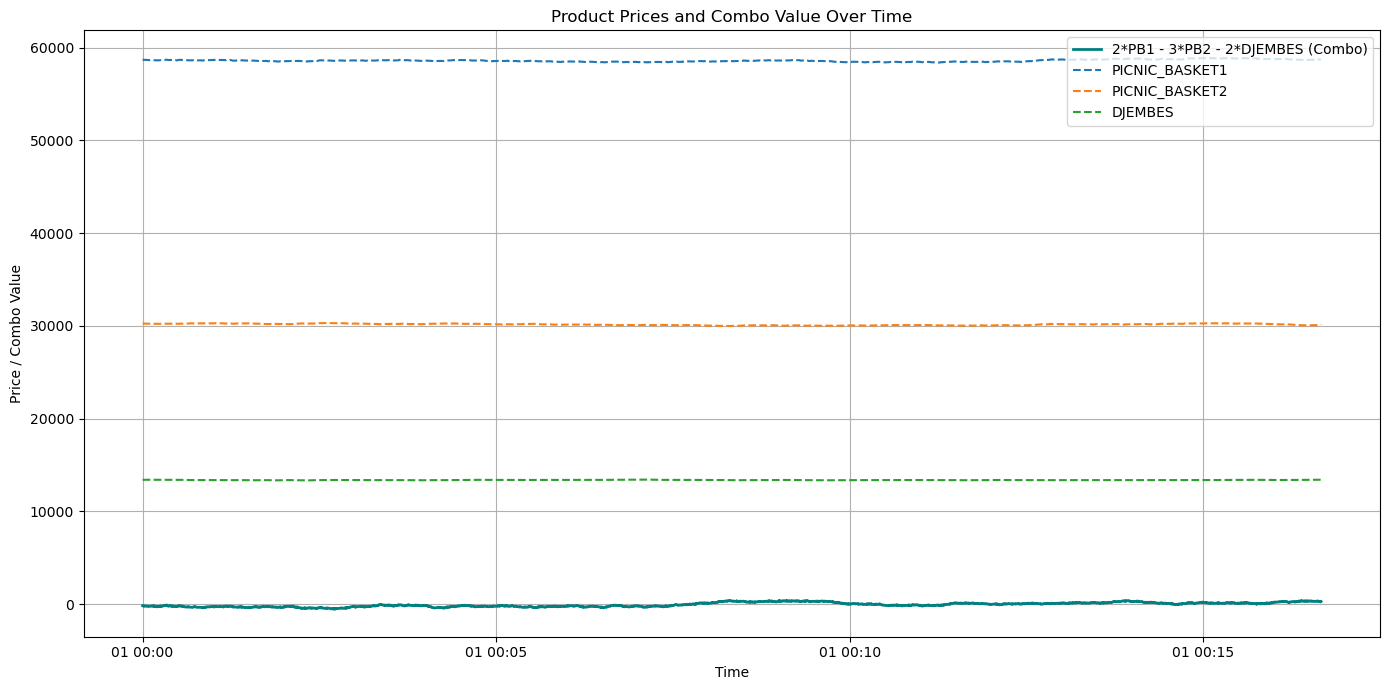

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV with the correct separator
df_raw = pd.read_csv(r"C:\Users\yashr\Downloads\round-3-island-data-bottle\round-3-island-data-bottle\prices_round_3_day_1.csv", delimiter=';')
# Keep only necessary columns
df_filtered = df_raw[['timestamp', 'product', 'mid_price']]

# Pivot the table: one row per timestamp, columns are products
df_pivot = df_filtered.pivot(index='timestamp', columns='product', values='mid_price').reset_index()

# Convert timestamp to datetime (milliseconds)
df_pivot['datetime'] = pd.to_datetime(df_pivot['timestamp'], unit='ms')

# Compute the combo
df_pivot['combo'] = (
    2 * df_pivot['PICNIC_BASKET1'] -
    3 * df_pivot['PICNIC_BASKET2'] -
    2 * df_pivot['DJEMBES']
)

# Plot combo and individual products
plt.figure(figsize=(14, 7))
plt.plot(df_pivot['datetime'], df_pivot['combo'], label='2*PB1 - 3*PB2 - 2*DJEMBES (Combo)', color='teal', linewidth=2)
plt.plot(df_pivot['datetime'], df_pivot['PICNIC_BASKET1'], label='PICNIC_BASKET1', linestyle='--')
plt.plot(df_pivot['datetime'], df_pivot['PICNIC_BASKET2'], label='PICNIC_BASKET2', linestyle='--')
plt.plot(df_pivot['datetime'], df_pivot['DJEMBES'], label='DJEMBES', linestyle='--')

plt.xlabel("Time")
plt.ylabel("Price / Combo Value")
plt.title("Product Prices and Combo Value Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# # Drop non-product columns
# product_cols = df_pivot.columns.difference(['timestamp', 'datetime', 'combo'])

# # Compute mean and standard deviation
# stats = df_pivot[product_cols].agg(['mean', 'std']).T
# stats.columns = ['Mean', 'Standard Deviation']

# # Display the stats
# print(stats)

# # Compute bid-ask spread
# df_raw['bid_ask_spread'] = df_raw['ask_price_1'] - df_raw['bid_price_1']

# # Group by product and compute stats
# spread_stats = df_raw.groupby('product')['bid_ask_spread'].agg(['mean', 'std'])

# print(spread_stats)

# # Compute bid-ask spread
# df_raw['bid_ask_spread'] = df_raw['ask_price_1'] - df_raw['bid_price_1']

# # Convert timestamp to datetime
# df_raw['datetime'] = pd.to_datetime(df_raw['timestamp'], unit='ms')

# # Plot bid-ask spread for each product
# plt.figure(figsize=(14, 7))

# for product, group in df_raw.groupby('product'):
#     plt.plot(group['datetime'], group['bid_ask_spread'], label=product, linewidth=1)

# plt.title("Bid-Ask Spread Over Time")
# plt.xlabel("Time")
# plt.ylabel("Spread (ask - bid)")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # Calculate bid-ask spread and convert timestamp
# df_raw['bid_ask_spread'] = df_raw['ask_price_1'] - df_raw['bid_price_1']
# df_raw['datetime'] = pd.to_datetime(df_raw['timestamp'], unit='ms')

# # Group by product
# grouped = df_raw.groupby('product')

# # Scatter plot for each instrument
# for product, group in grouped:
#     plt.figure(figsize=(12, 5))
#     plt.scatter(group['datetime'], group['bid_ask_spread'], label=f"{product} Spread", color='darkblue', s=10, alpha=0.6)
#     plt.title(f"Bid-Ask Spread Over Time - {product}")
#     plt.xlabel("Time")
#     plt.ylabel("Spread (ask - bid)")
#     plt.grid(True)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()
# # Convert timestamp
# df_raw['datetime'] = pd.to_datetime(df_raw['timestamp'], unit='ms')

# # Group by product
# grouped = df_raw.groupby('product')

# # For each product, plot bid and ask volumes
# for product, group in grouped:
#     plt.figure(figsize=(12, 5))
    
#     # Line plot for bid volume
#     plt.plot(group['datetime'], group['bid_volume_1'], label='Bid Volume', color='green')
    
#     # Line plot for ask volume
#     plt.plot(group['datetime'], group['ask_volume_1'], label='Ask Volume', color='red')
    
#     plt.title(f"Bid & Ask Volumes Over Time - {product}")
#     plt.xlabel("Time")
#     plt.ylabel("Volume")
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# # Convert timestamp
# df_raw['datetime'] = pd.to_datetime(df_raw['timestamp'], unit='ms')

# # Group by product
# grouped = df_raw.groupby('product')

# # For each product, plot bid and ask volumes
# for product, group in grouped:
#     plt.figure(figsize=(12, 5))
    
#     # Scatter plot for bid volume
#     plt.scatter(group['datetime'], group['bid_volume_1'], label='Bid Volume', color='green', s=10, alpha=0.6)
    
#     # Scatter plot for ask volume
#     plt.scatter(group['datetime'], group['ask_volume_1'], label='Ask Volume', color='red', s=10, alpha=0.6)
    
#     plt.title(f"Bid & Ask Volumes Over Time - {product}")
#     plt.xlabel("Time")
#     plt.ylabel("Volume")
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()


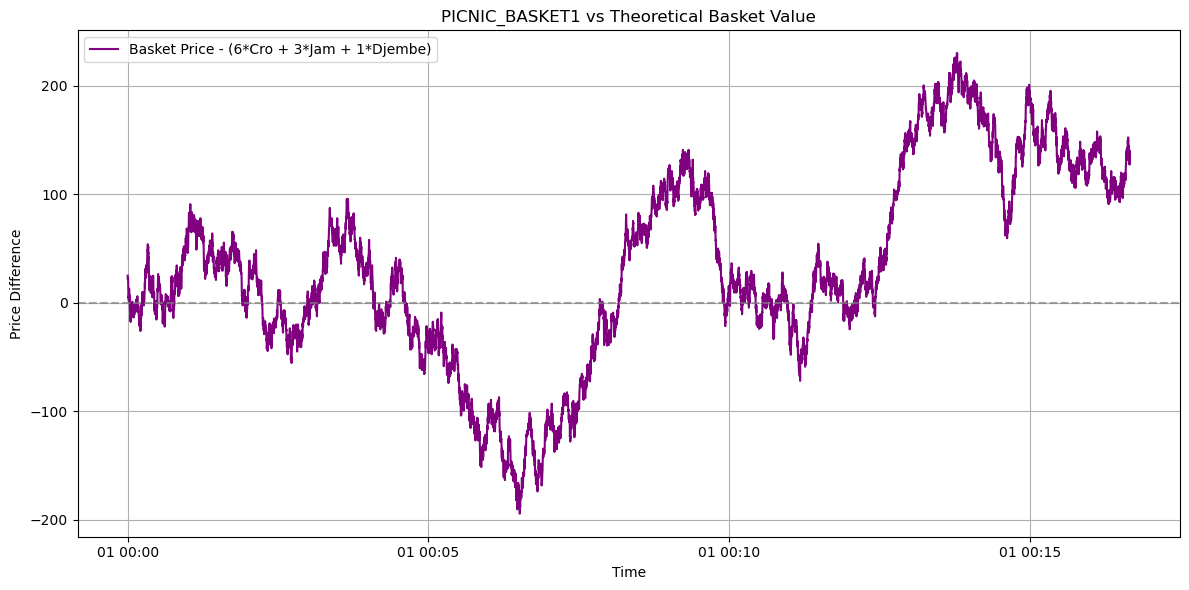

In [59]:
# Convert timestamp to datetime
df_raw['datetime'] = pd.to_datetime(df_raw['timestamp'], unit='ms')

# Filter only relevant products
products = ['PICNIC_BASKET1', 'CROISSANTS', 'JAMS', 'DJEMBES']
df_filtered = df_raw[df_raw['product'].isin(products)]

# Pivot to get mid_price for each product
df_pivot = df_filtered.pivot(index='datetime', columns='product', values='mid_price').reset_index()

# Drop rows with missing data to ensure clean subtraction
df_pivot.dropna(subset=['PICNIC_BASKET1', 'CROISSANTS', 'JAMS', 'DJEMBES'], inplace=True)

# Calculate the difference
df_pivot['basket_diff'] = df_pivot['PICNIC_BASKET1'] - (
    6 * df_pivot['CROISSANTS'] + 3 * df_pivot['JAMS'] + df_pivot['DJEMBES']
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_pivot['datetime'], df_pivot['basket_diff'], label='Basket Price - (6*Cro + 3*Jam + 1*Djembe)', color='purple')
plt.axhline(0, linestyle='--', color='gray', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Price Difference")
plt.title("PICNIC_BASKET1 vs Theoretical Basket Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

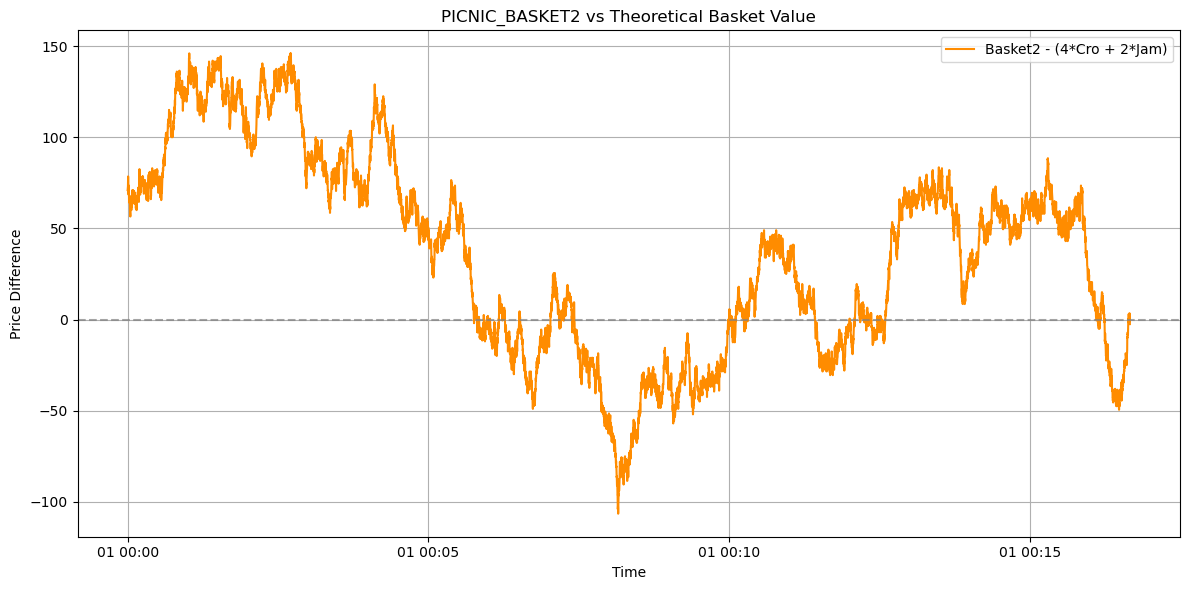

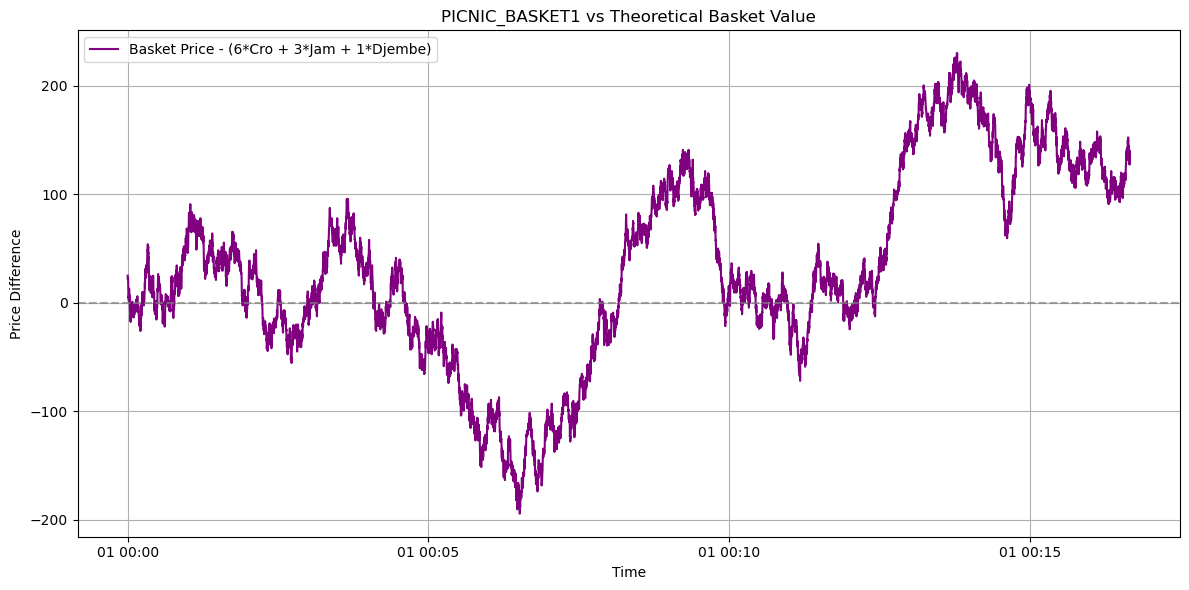

In [75]:
# Convert timestamp to datetime
df_raw['datetime'] = pd.to_datetime(df_raw['timestamp'], unit='ms')

# Filter relevant products
products = ['PICNIC_BASKET2', 'CROISSANTS', 'JAMS']
df_filtered = df_raw[df_raw['product'].isin(products)]

# Pivot to get mid_price for each product
df_pivot = df_filtered.pivot(index='datetime', columns='product', values='mid_price').reset_index()

# Drop rows with missing values
# df_pivot.dropna(subset=['PICNIC_BASKET2', 'CROISSANTS', 'JAMS'], inplace=True)

# Compute the difference
df_pivot['basket2_diff'] = df_pivot['PICNIC_BASKET2'] - (
    4 * df_pivot['CROISSANTS'] + 2 * df_pivot['JAMS']
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_pivot['datetime'], df_pivot['basket2_diff'], label='Basket2 - (4*Cro + 2*Jam)', color='darkorange')
plt.axhline(0, linestyle='--', color='gray', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Price Difference")
plt.title("PICNIC_BASKET2 vs Theoretical Basket Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Convert timestamp to datetime
df_raw['datetime'] = pd.to_datetime(df_raw['timestamp'], unit='ms')

# Filter only relevant products
products = ['PICNIC_BASKET1', 'CROISSANTS', 'JAMS', 'DJEMBES']
df_filtered = df_raw[df_raw['product'].isin(products)]

# Pivot to get mid_price for each product
df_pivot = df_filtered.pivot(index='datetime', columns='product', values='mid_price').reset_index()

# Drop rows with missing data to ensure clean subtraction
# df_pivot.dropna(subset=['PICNIC_BASKET1', 'CROISSANTS', 'JAMS', 'DJEMBES'], inplace=True)

# Calculate the difference
df_pivot['basket_diff'] = df_pivot['PICNIC_BASKET1'] - (
    6 * df_pivot['CROISSANTS'] + 3 * df_pivot['JAMS'] + df_pivot['DJEMBES']
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_pivot['datetime'], df_pivot['basket_diff'], label='Basket Price - (6*Cro + 3*Jam + 1*Djembe)', color='purple')
plt.axhline(0, linestyle='--', color='gray', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Price Difference")
plt.title("PICNIC_BASKET1 vs Theoretical Basket Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

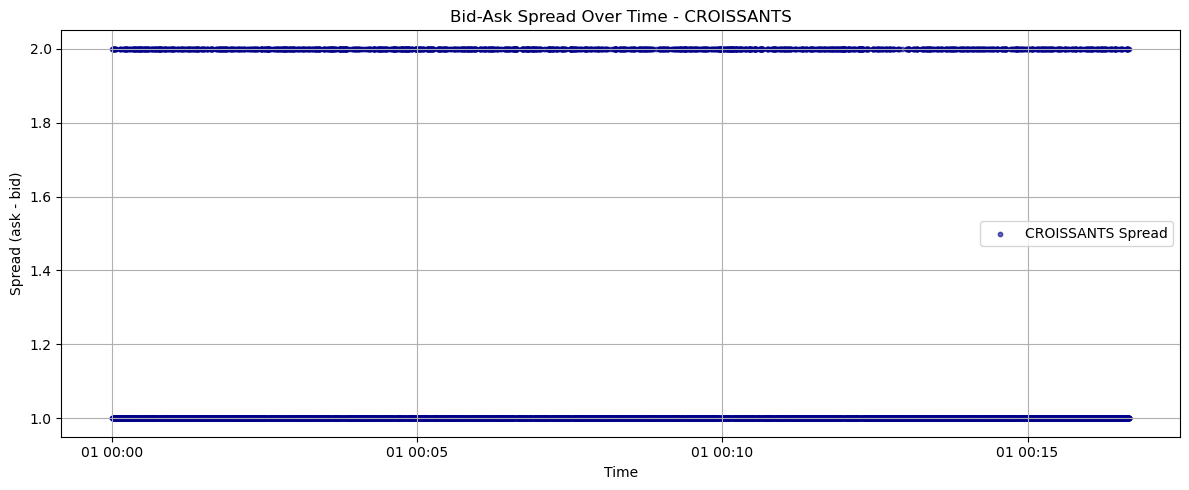

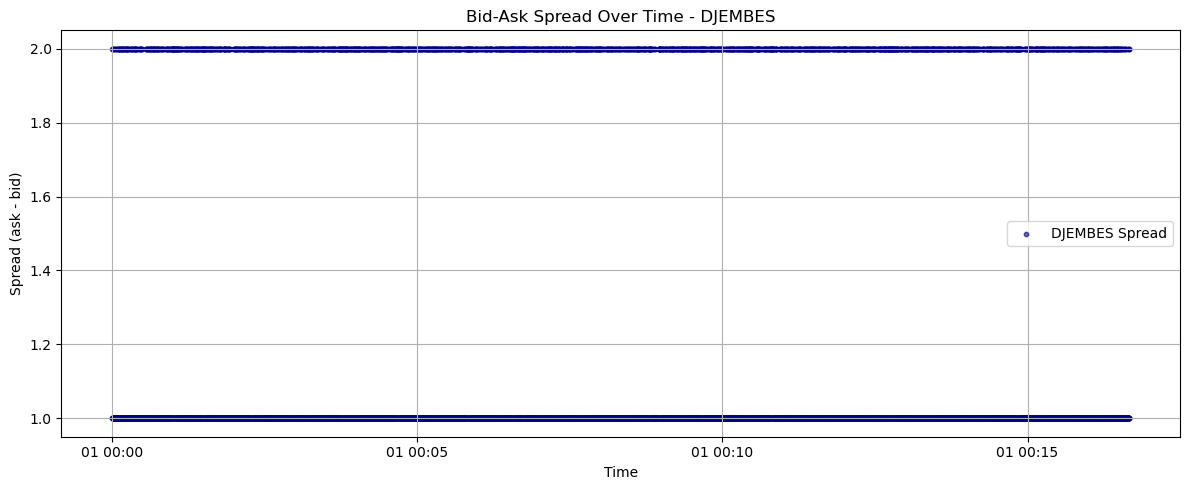

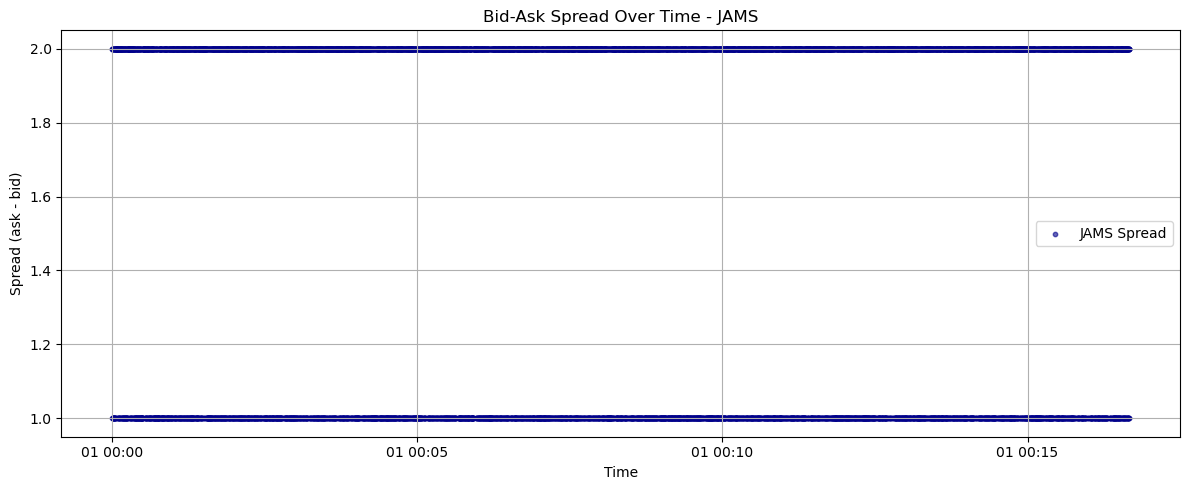

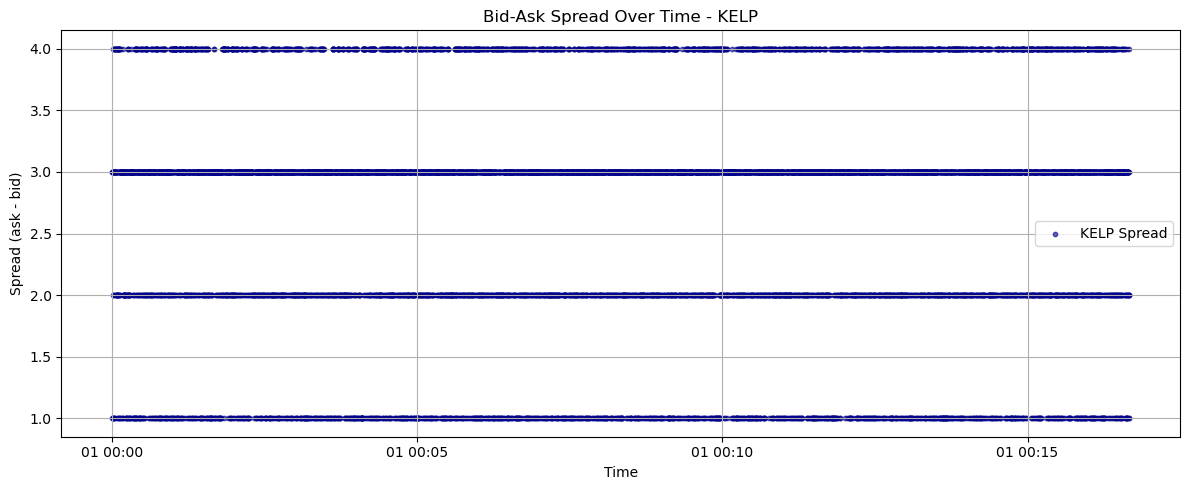

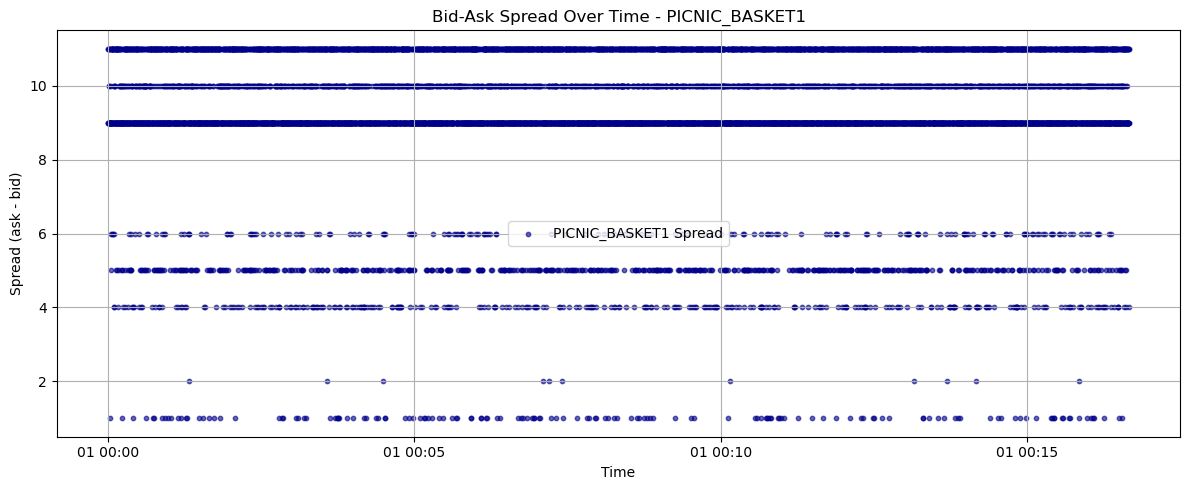

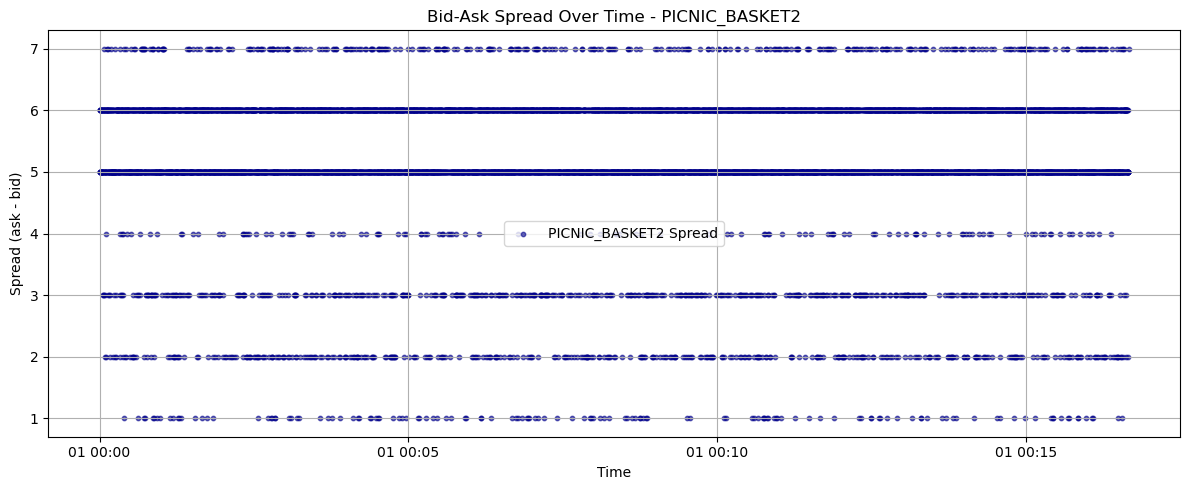

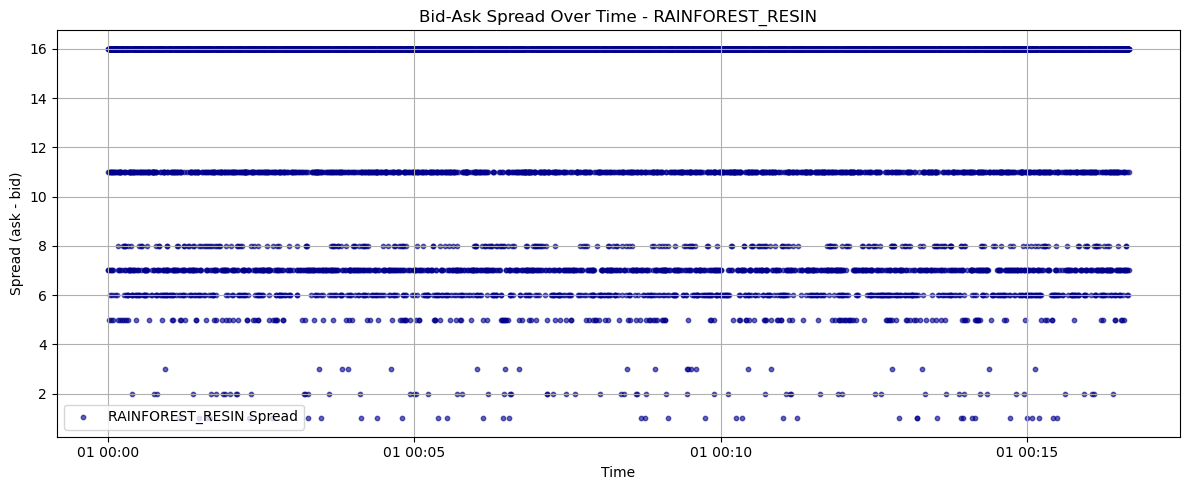

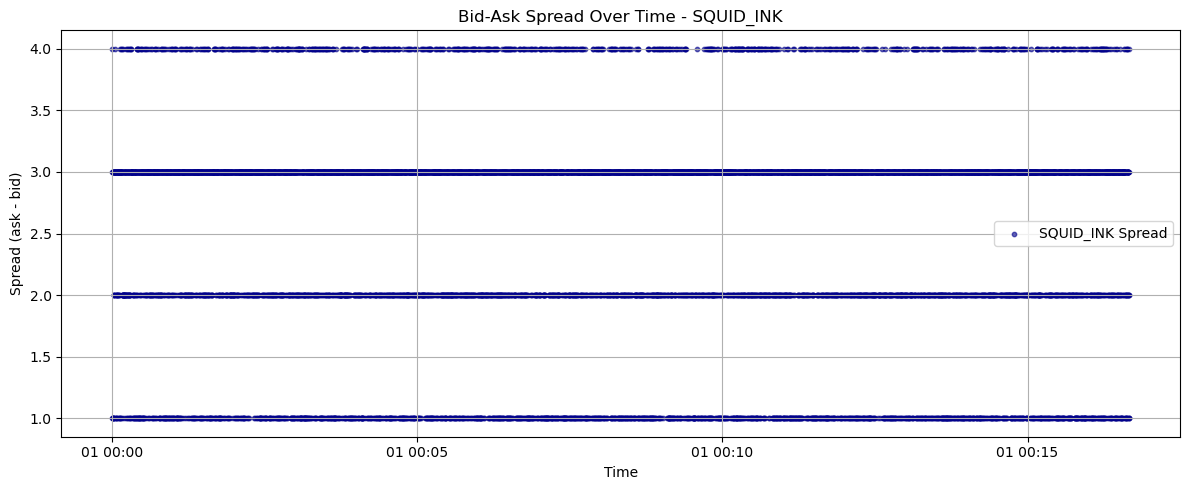

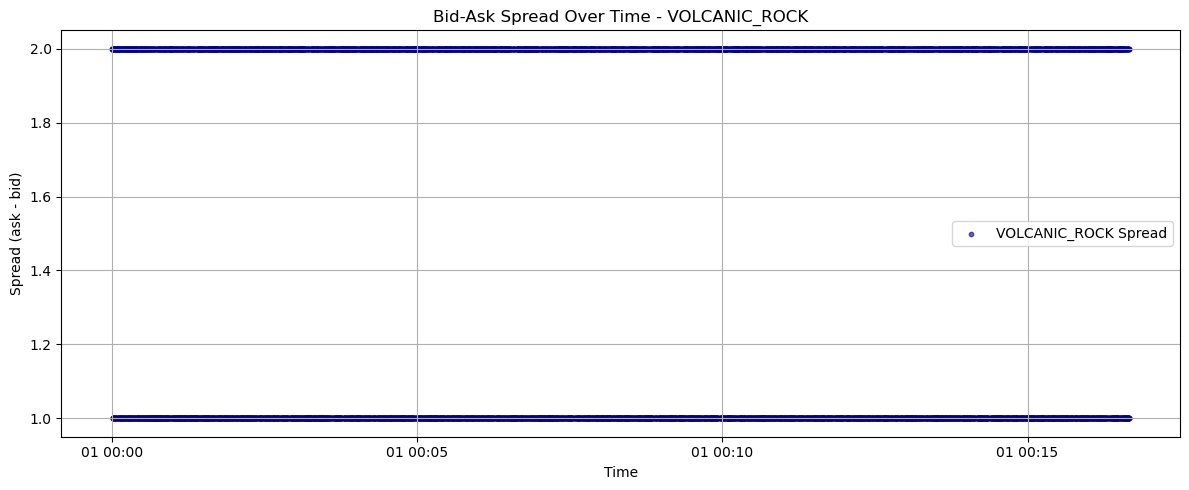

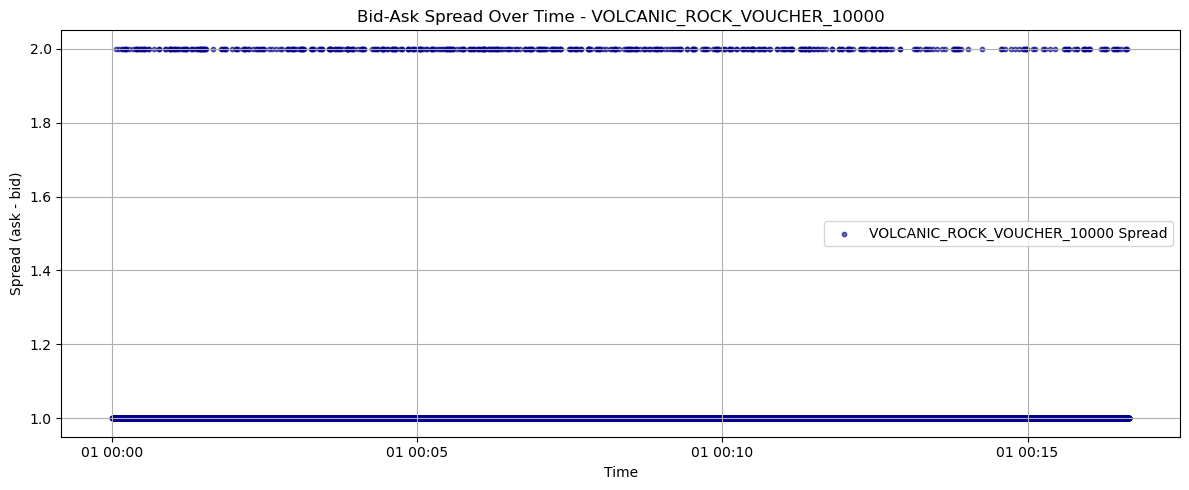

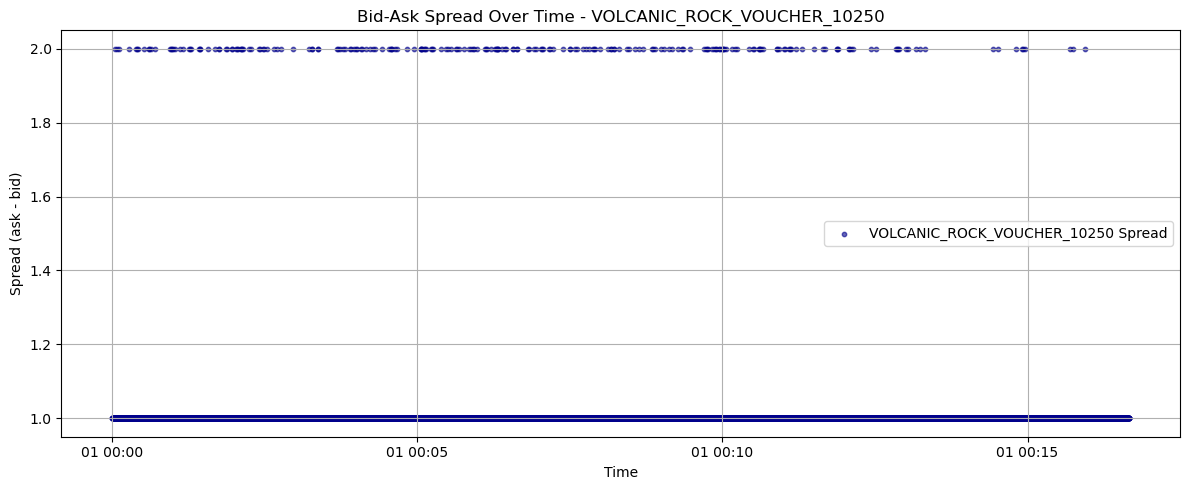

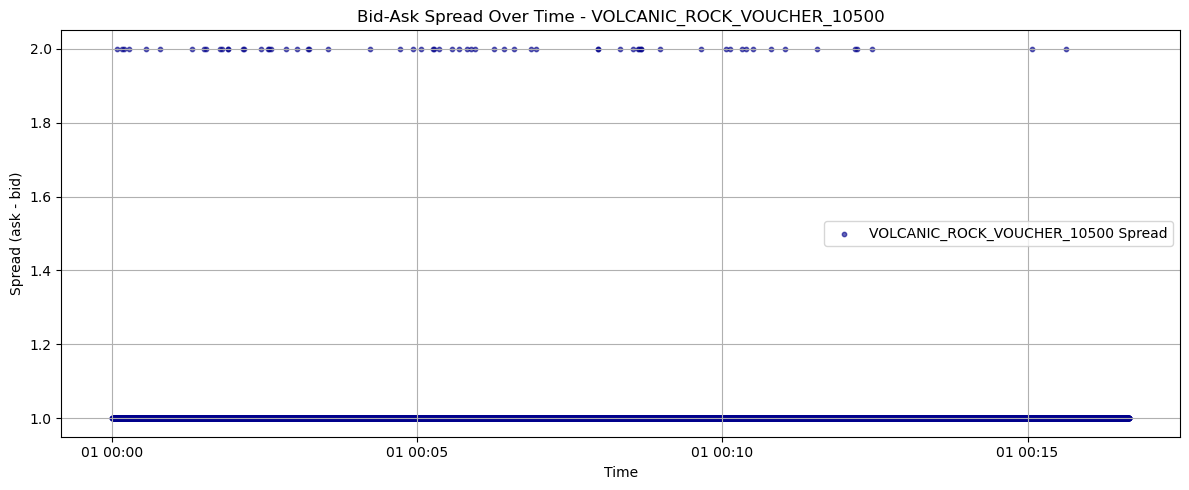

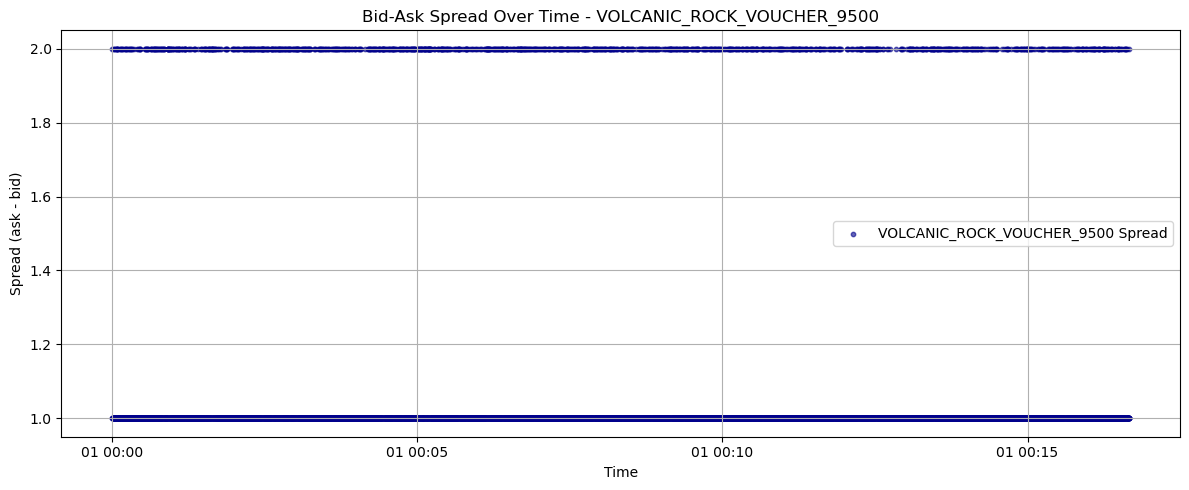

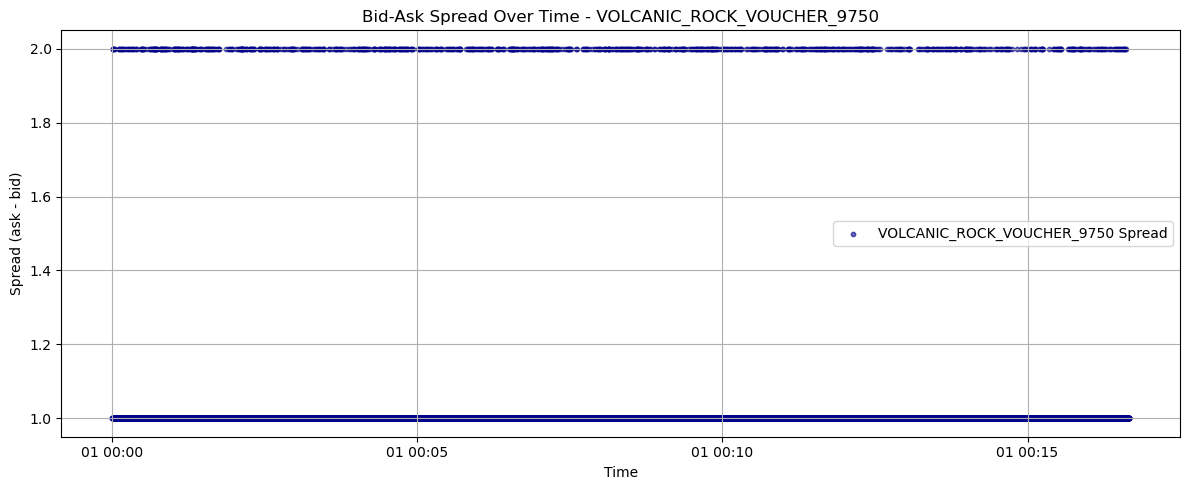

In [52]:
# Calculate bid-ask spread and convert timestamp
df_raw['bid_ask_spread'] = df_raw['ask_price_1'] - df_raw['bid_price_1']
df_raw['datetime'] = pd.to_datetime(df_raw['timestamp'], unit='ms')

# Group by product
grouped = df_raw.groupby('product')

# Scatter plot for each instrument
for product, group in grouped:
    plt.figure(figsize=(12, 5))
    plt.scatter(group['datetime'], group['bid_ask_spread'], label=f"{product} Spread", color='darkblue', s=10, alpha=0.6)
    plt.title(f"Bid-Ask Spread Over Time - {product}")
    plt.xlabel("Time")
    plt.ylabel("Spread (ask - bid)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
# Convert timestamp
df_raw['datetime'] = pd.to_datetime(df_raw['timestamp'], unit='ms')

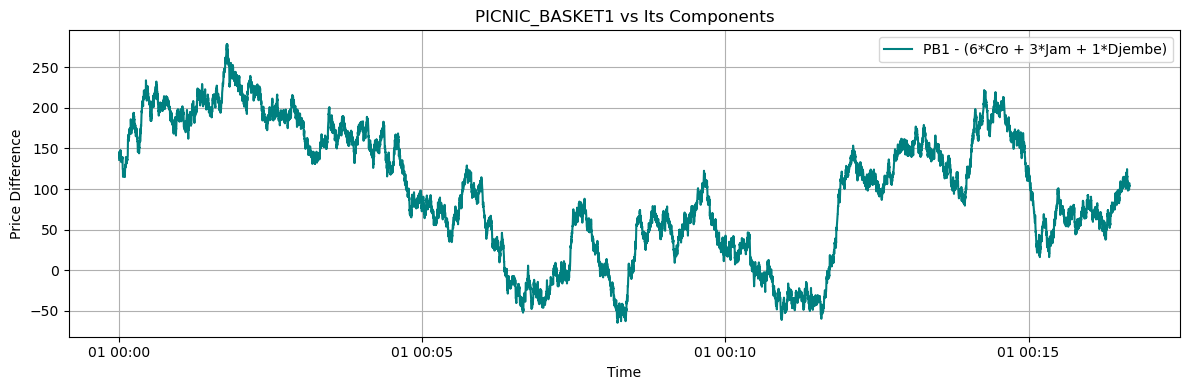

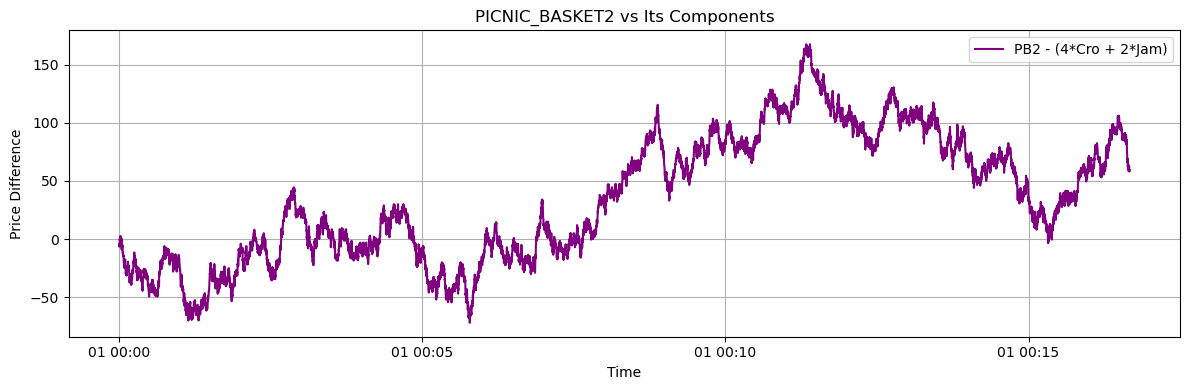

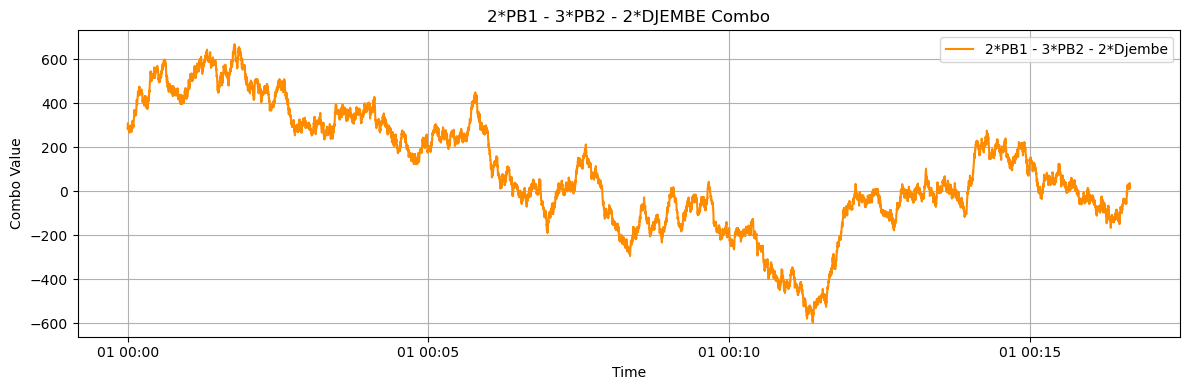

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV with the correct separator
df_raw = pd.read_csv(r"C:\Users\yashr\Downloads\round-3-island-data-bottle\round-3-island-data-bottle\prices_round_3_day_2.csv", delimiter=';')

# Keep only necessary columns
df_filtered = df_raw[['timestamp', 'product', 'mid_price']]

# Pivot the table: one row per timestamp, columns are products
df_pivot = df_filtered.pivot(index='timestamp', columns='product', values='mid_price').reset_index()

# Convert timestamp to datetime (milliseconds)
df_pivot['datetime'] = pd.to_datetime(df_pivot['timestamp'], unit='ms')

# Compute combo
df_pivot['combo'] = (
    2 * df_pivot['PICNIC_BASKET1'] -
    3 * df_pivot['PICNIC_BASKET2'] -
    2 * df_pivot['DJEMBES']
)

# Calculate differences
df_pivot['basket1_diff'] = df_pivot['PICNIC_BASKET1'] - (
    6 * df_pivot['CROISSANTS'] + 3 * df_pivot['JAMS'] + df_pivot['DJEMBES']
)

df_pivot['basket2_diff'] = df_pivot['PICNIC_BASKET2'] - (
    4 * df_pivot['CROISSANTS'] + 2 * df_pivot['JAMS']
)

df_pivot['combo_diff'] = df_pivot['combo']  # optional alias

# Plot basket1_diff
plt.figure(figsize=(12, 4))
plt.plot(df_pivot['datetime'], df_pivot['basket1_diff'], label='PB1 - (6*Cro + 3*Jam + 1*Djembe)', color='teal')
plt.title("PICNIC_BASKET1 vs Its Components")
plt.xlabel("Time")
plt.ylabel("Price Difference")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot basket2_diff
plt.figure(figsize=(12, 4))
plt.plot(df_pivot['datetime'], df_pivot['basket2_diff'], label='PB2 - (4*Cro + 2*Jam)', color='purple')
plt.title("PICNIC_BASKET2 vs Its Components")
plt.xlabel("Time")
plt.ylabel("Price Difference")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot combo_diff
plt.figure(figsize=(12, 4))
plt.plot(df_pivot['datetime'], df_pivot['combo_diff'], label='2*PB1 - 3*PB2 - 2*Djembe', color='darkorange')
plt.title("2*PB1 - 3*PB2 - 2*DJEMBE Combo")
plt.xlabel("Time")
plt.ylabel("Combo Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Correlation between basket1_diff and basket2_diff:
product       basket1_diff  basket2_diff
product                                 
basket1_diff      1.000000      0.700295
basket2_diff      0.700295      1.000000


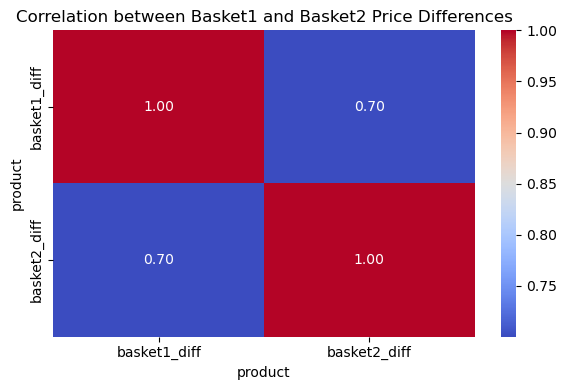

In [47]:
import seaborn as sns

# Calculate correlation
correlation = df_pivot[['basket1_diff', 'basket2_diff']].corr()

# Print correlation value
print("Correlation between basket1_diff and basket2_diff:")
print(correlation)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Basket1 and Basket2 Price Differences")
plt.tight_layout()
plt.show()

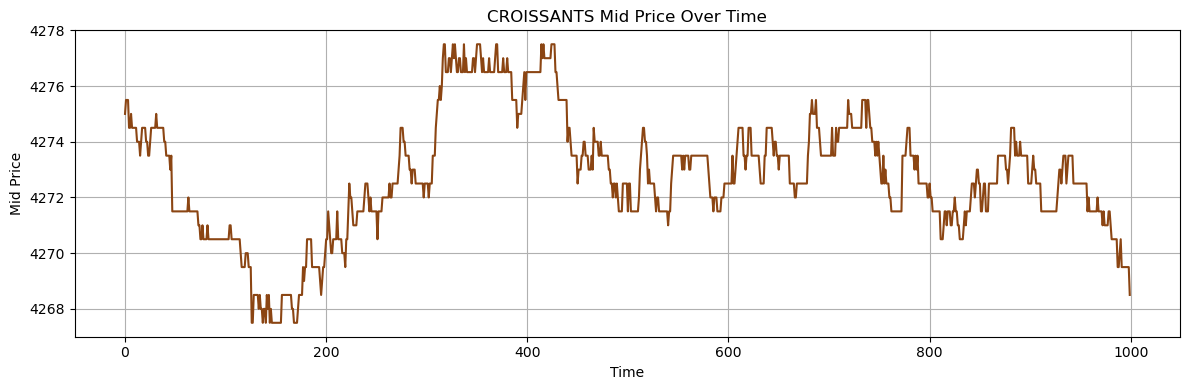

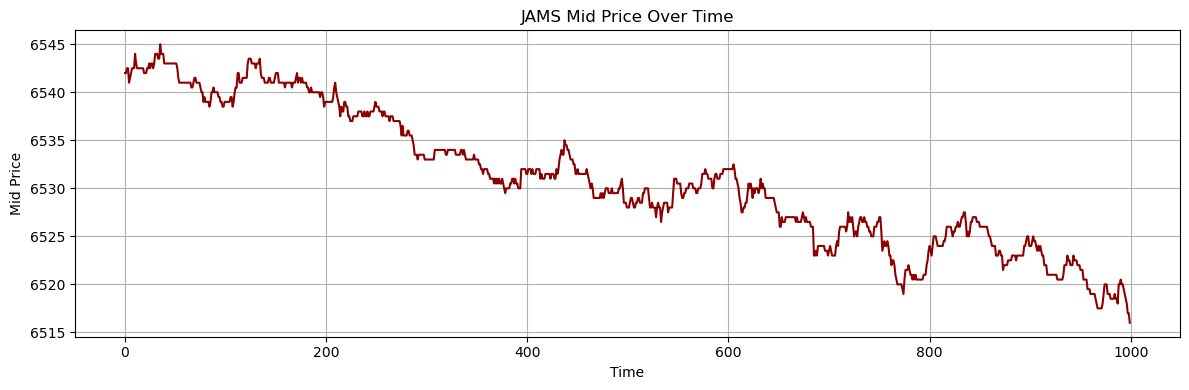

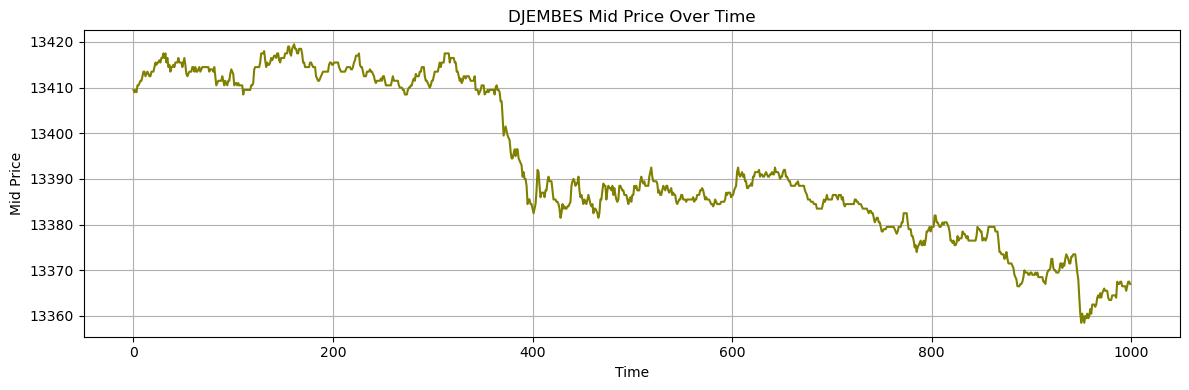

In [49]:
# CROISSANTS
plt.figure(figsize=(12, 4))
plt.plot(df_pivot.index, df_pivot['CROISSANTS'], color='saddlebrown')
plt.title("CROISSANTS Mid Price Over Time")
plt.xlabel("Time")
plt.ylabel("Mid Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# JAMS
plt.figure(figsize=(12, 4))
plt.plot(df_pivot.index, df_pivot['JAMS'], color='darkred')
plt.title("JAMS Mid Price Over Time")
plt.xlabel("Time")
plt.ylabel("Mid Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# DJEMBES
plt.figure(figsize=(12, 4))
plt.plot(df_pivot.index, df_pivot['DJEMBES'], color='olive')
plt.title("DJEMBES Mid Price Over Time")
plt.xlabel("Time")
plt.ylabel("Mid Price")
plt.grid(True)
plt.tight_layout()
plt.show()

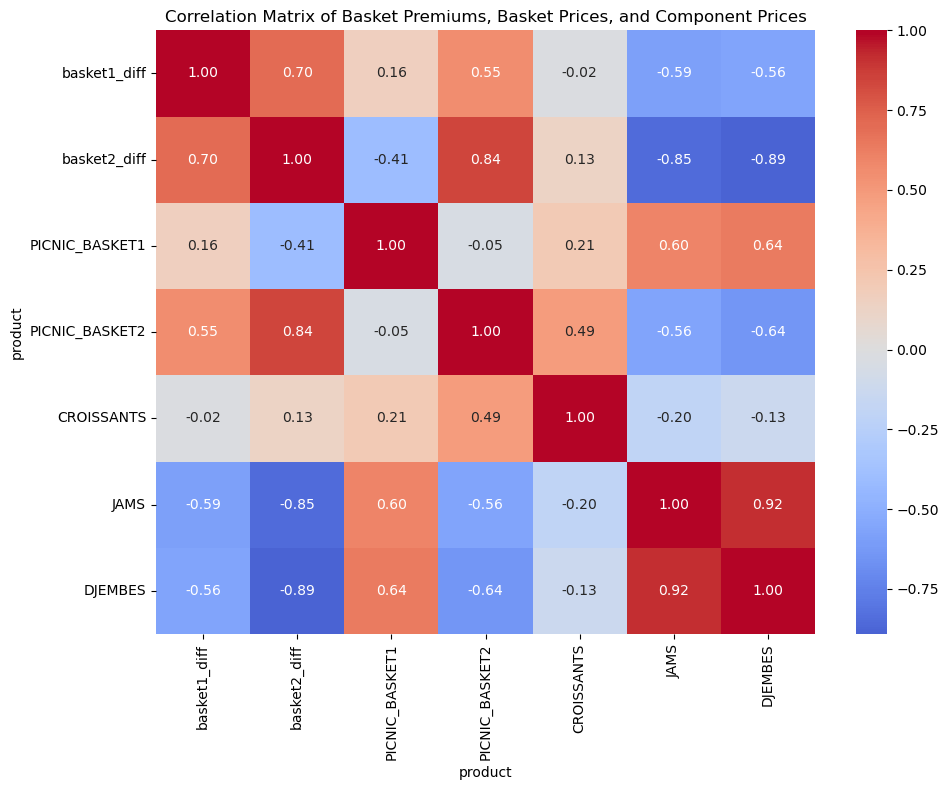

product         basket1_diff  basket2_diff  PICNIC_BASKET1  PICNIC_BASKET2  \
product                                                                      
basket1_diff        1.000000      0.700295        0.160381        0.549548   
basket2_diff        0.700295      1.000000       -0.410075        0.843542   
PICNIC_BASKET1      0.160381     -0.410075        1.000000       -0.047926   
PICNIC_BASKET2      0.549548      0.843542       -0.047926        1.000000   
CROISSANTS         -0.015315      0.128897        0.205317        0.487558   
JAMS               -0.587401     -0.851815        0.596517       -0.559086   
DJEMBES            -0.563668     -0.891559        0.636374       -0.643879   

product         CROISSANTS      JAMS   DJEMBES  
product                                         
basket1_diff     -0.015315 -0.587401 -0.563668  
basket2_diff      0.128897 -0.851815 -0.891559  
PICNIC_BASKET1    0.205317  0.596517  0.636374  
PICNIC_BASKET2    0.487558 -0.559086 -0.643879  
CRO

In [51]:
# First calculate the premiums if not done already
df_pivot['basket1_diff'] = df_pivot['PICNIC_BASKET1'] - (
    6 * df_pivot['CROISSANTS'] + 3 * df_pivot['JAMS'] + df_pivot['DJEMBES']
)

df_pivot['basket2_diff'] = df_pivot['PICNIC_BASKET2'] - (
    4 * df_pivot['CROISSANTS'] + 2 * df_pivot['JAMS']
)

# Select relevant columns
corr_df = df_pivot[[
    'basket1_diff', 'basket2_diff',
    'PICNIC_BASKET1', 'PICNIC_BASKET2',
    'CROISSANTS', 'JAMS', 'DJEMBES'
]]

# Compute correlation matrix
correlation_matrix = corr_df.corr()

# Display correlation table
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Basket Premiums, Basket Prices, and Component Prices")
plt.tight_layout()
plt.show()

# Optional: print the matrix
print(correlation_matrix)


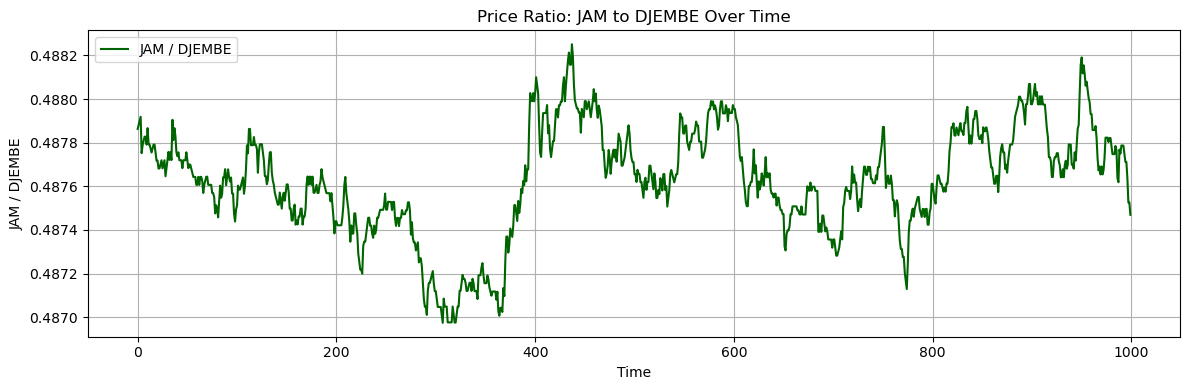

In [53]:
# Calculate ratio of JAM to DJEMBE
df_pivot['jam_djembe_ratio'] = df_pivot['JAMS'] / df_pivot['DJEMBES']

# Plot the ratio over time
plt.figure(figsize=(12, 4))
plt.plot(df_pivot.index, df_pivot['jam_djembe_ratio'], label='JAM / DJEMBE', color='darkgreen')
plt.title("Price Ratio: JAM to DJEMBE Over Time")
plt.xlabel("Time")
plt.ylabel("JAM / DJEMBE")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Mean JAM/DJEMBE Ratio: 0.4876


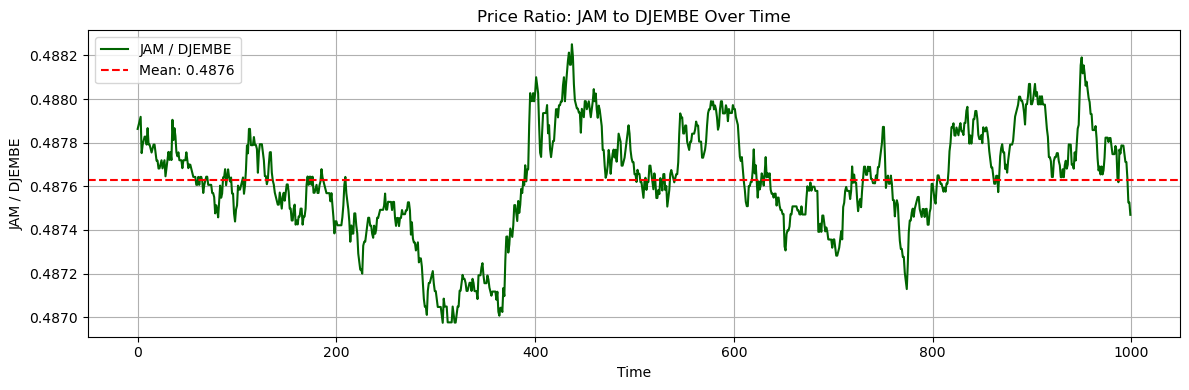

In [55]:
# Calculate the ratio
df_pivot['jam_djembe_ratio'] = df_pivot['JAMS'] / df_pivot['DJEMBES']

# Calculate the mean of the ratio
mean_ratio = df_pivot['jam_djembe_ratio'].mean()
print(f"Mean JAM/DJEMBE Ratio: {mean_ratio:.4f}")

# Plot the ratio over time with mean line
plt.figure(figsize=(12, 4))
plt.plot(df_pivot.index, df_pivot['jam_djembe_ratio'], label='JAM / DJEMBE', color='darkgreen')
plt.axhline(mean_ratio, color='red', linestyle='--', label=f'Mean: {mean_ratio:.4f}')
plt.title("Price Ratio: JAM to DJEMBE Over Time")
plt.xlabel("Time")
plt.ylabel("JAM / DJEMBE")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


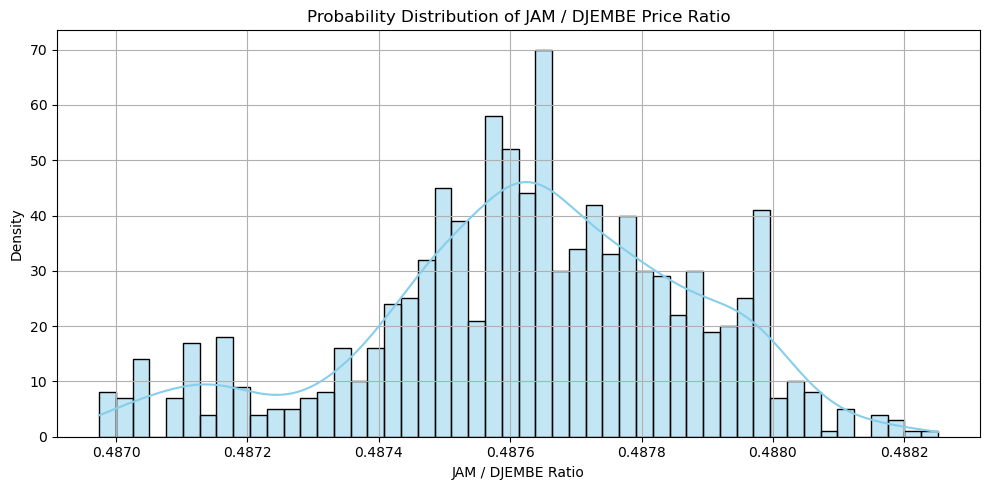

In [59]:
import seaborn as sns
import numpy as np

# Remove any NaN or infinite values just in case
valid_ratios = df_pivot['jam_djembe_ratio'].replace([np.inf, -np.inf], np.nan).dropna()

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(valid_ratios, kde=True, bins=50, color='skyblue')
plt.title("Probability Distribution of JAM / DJEMBE Price Ratio")
plt.xlabel("JAM / DJEMBE Ratio")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

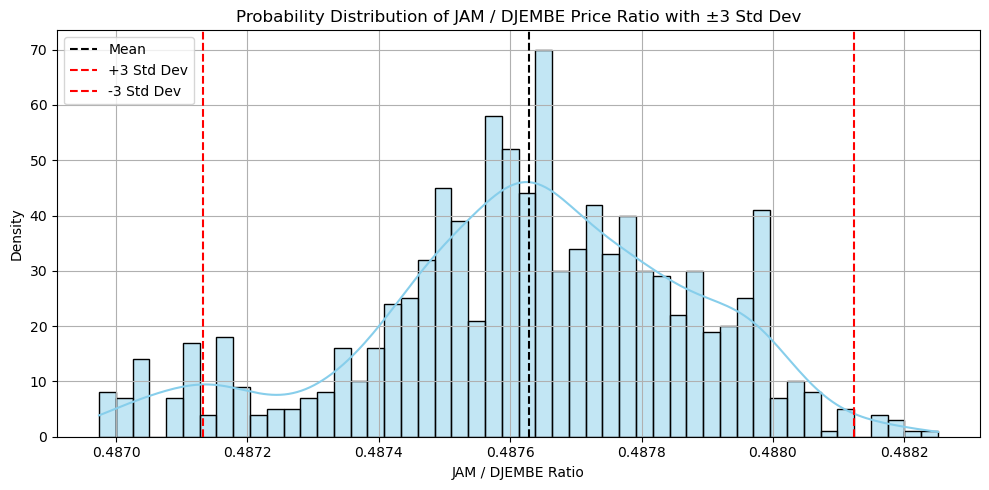

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Remove NaNs or infinite values
valid_ratios = df_pivot['jam_djembe_ratio'].replace([np.inf, -np.inf], np.nan).dropna()

# Calculate mean and std dev
mean_ratio = valid_ratios.mean()
std_ratio = valid_ratios.std()

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(valid_ratios, kde=True, bins=50, color='skyblue')
plt.axvline(mean_ratio, color='black', linestyle='--', label='Mean')

# Plot ±3 std dev lines
plt.axvline(mean_ratio + 2 * std_ratio, color='red', linestyle='--', label='+3 Std Dev')
plt.axvline(mean_ratio - 2 * std_ratio, color='red', linestyle='--', label='-3 Std Dev')

plt.title("Probability Distribution of JAM / DJEMBE Price Ratio with ±3 Std Dev")
plt.xlabel("JAM / DJEMBE Ratio")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [87]:
df_raw = pd.read_csv(r"C:\Users\yashr\Downloads\round-2-island-data-bottle\round-2-island-data-bottle\prices_round_2_day_1.csv", sep=';')

# Keep only necessary columns
df_filtered = df_raw[['timestamp', 'product', 'mid_price']]

# Pivot the table: one row per timestamp, columns are products
df_pivot = df_filtered.pivot(index='timestamp', columns='product', values='mid_price').reset_index()

# Convert timestamp to datetime (milliseconds)
df_pivot['datetime'] = pd.to_datetime(df_pivot['timestamp'], unit='ms')

# Compute the combo
df_pivot['combo'] = (
    2 * df_pivot['PICNIC_BASKET1'] -
    3 * df_pivot['PICNIC_BASKET2'] -
    2 * df_pivot['DJEMBES']
)


Mean JAM/DJEMBE Ratio: 0.4874


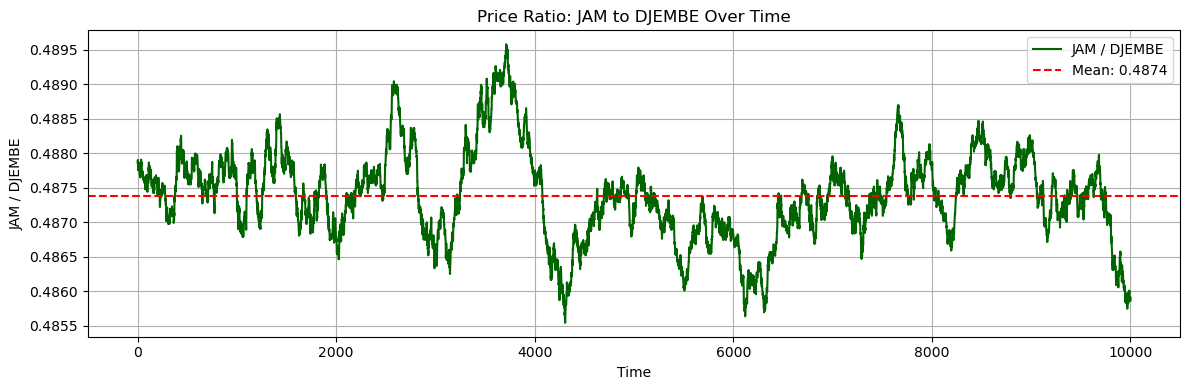

In [88]:
# Calculate the ratio
df_pivot['jam_djembe_ratio'] = df_pivot['JAMS'] / df_pivot['DJEMBES']

# Calculate the mean of the ratio
mean_ratio = df_pivot['jam_djembe_ratio'].mean()
print(f"Mean JAM/DJEMBE Ratio: {mean_ratio:.4f}")

# Plot the ratio over time with mean line
plt.figure(figsize=(12, 4))
plt.plot(df_pivot.index, df_pivot['jam_djembe_ratio'], label='JAM / DJEMBE', color='darkgreen')
plt.axhline(mean_ratio, color='red', linestyle='--', label=f'Mean: {mean_ratio:.4f}')
plt.title("Price Ratio: JAM to DJEMBE Over Time")
plt.xlabel("Time")
plt.ylabel("JAM / DJEMBE")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


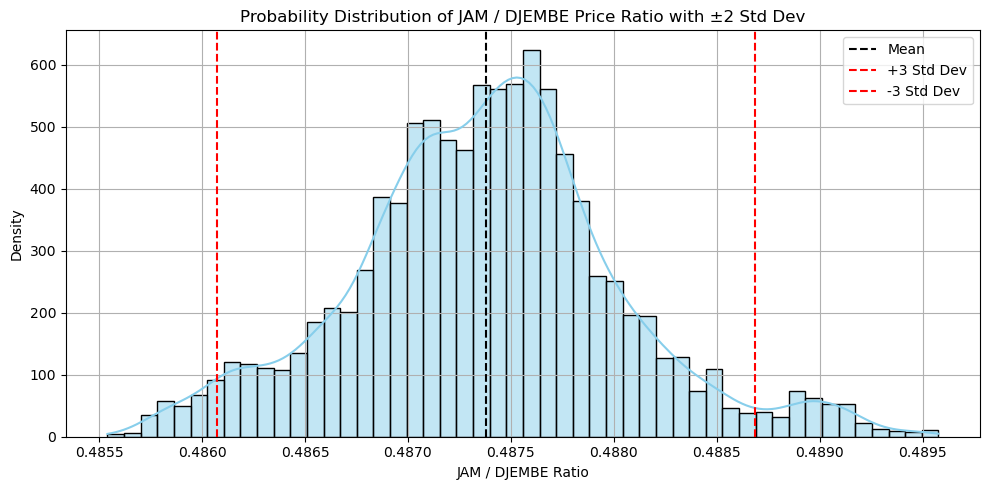

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Remove NaNs or infinite values
valid_ratios = df_pivot['jam_djembe_ratio'].replace([np.inf, -np.inf], np.nan).dropna()

# Calculate mean and std dev
mean_ratio = valid_ratios.mean()
std_ratio = valid_ratios.std()

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(valid_ratios, kde=True, bins=50, color='skyblue')
plt.axvline(mean_ratio, color='black', linestyle='--', label='Mean')

# Plot ±3 std dev lines
plt.axvline(mean_ratio + 2 * std_ratio, color='red', linestyle='--', label='+3 Std Dev')
plt.axvline(mean_ratio - 2 * std_ratio, color='red', linestyle='--', label='-3 Std Dev')

plt.title("Probability Distribution of JAM / DJEMBE Price Ratio with ±2 Std Dev")
plt.xlabel("JAM / DJEMBE Ratio")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


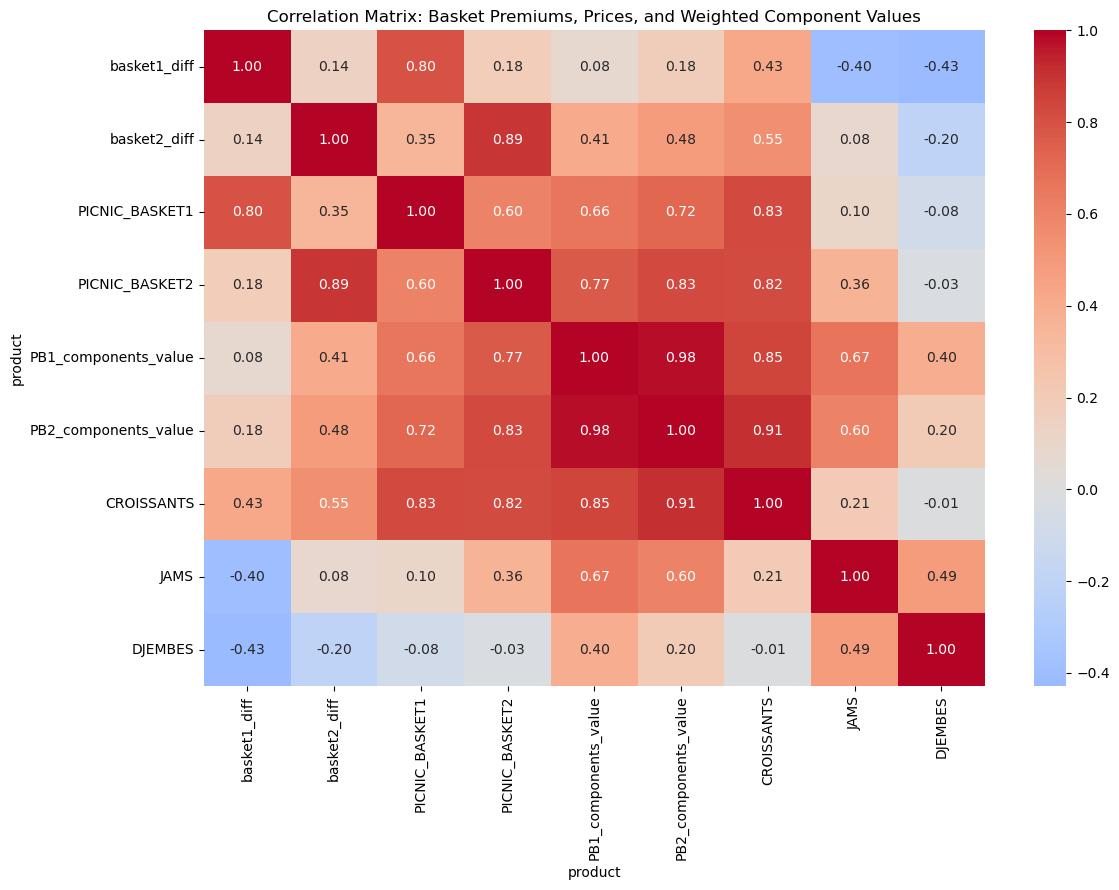

product               basket1_diff  basket2_diff  PICNIC_BASKET1  \
product                                                            
basket1_diff              1.000000      0.136870        0.800049   
basket2_diff              0.136870      1.000000        0.350737   
PICNIC_BASKET1            0.800049      0.350737        1.000000   
PICNIC_BASKET2            0.180222      0.891729        0.599201   
PB1_components_value      0.077668      0.411515        0.660261   
PB2_components_value      0.178744      0.484340        0.723602   
CROISSANTS                0.427390      0.550979        0.832070   
JAMS                     -0.395926      0.080471        0.103297   
DJEMBES                  -0.428733     -0.201579       -0.084072   

product               PICNIC_BASKET2  PB1_components_value  \
product                                                      
basket1_diff                0.180222              0.077668   
basket2_diff                0.891729              0.411515   
PIC

In [91]:
# First calculate the premiums
df_pivot['basket1_diff'] = df_pivot['PICNIC_BASKET1'] - (
    6 * df_pivot['CROISSANTS'] + 3 * df_pivot['JAMS'] + df_pivot['DJEMBES']
)

df_pivot['basket2_diff'] = df_pivot['PICNIC_BASKET2'] - (
    4 * df_pivot['CROISSANTS'] + 2 * df_pivot['JAMS']
)

# Calculate total value of components
df_pivot['PB1_components_value'] = 6 * df_pivot['CROISSANTS'] + 3 * df_pivot['JAMS'] + df_pivot['DJEMBES']
df_pivot['PB2_components_value'] = 4 * df_pivot['CROISSANTS'] + 2 * df_pivot['JAMS']

# Select relevant columns for correlation
corr_df = df_pivot[[
    'basket1_diff', 'basket2_diff',
    'PICNIC_BASKET1', 'PICNIC_BASKET2',
    'PB1_components_value', 'PB2_components_value',
    'CROISSANTS', 'JAMS', 'DJEMBES'
]]

# Compute correlation matrix
correlation_matrix = corr_df.corr()

# Display correlation matrix as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Basket Premiums, Prices, and Weighted Component Values")
plt.tight_layout()
plt.show()

# Optional: print correlation matrix
print(correlation_matrix)


In [104]:
df_raw = pd.read_csv(r"C:\Users\yashr\Downloads\round-2-island-data-bottle\round-2-island-data-bottle\prices_round_2_day_1.csv", sep=';')

# Keep only necessary columns
df_filtered = df_raw[['timestamp', 'product', 'mid_price']]

# Pivot the table: one row per timestamp, columns are products
df_pivot = df_filtered.pivot(index='timestamp', columns='product', values='mid_price').reset_index()

# Convert timestamp to datetime (milliseconds)
df_pivot['datetime'] = pd.to_datetime(df_pivot['timestamp'], unit='ms')

# Compute the combo
df_pivot['combo'] = (
    2 * df_pivot['PICNIC_BASKET1'] -
    3 * df_pivot['PICNIC_BASKET2'] -
    2 * df_pivot['DJEMBES']
)


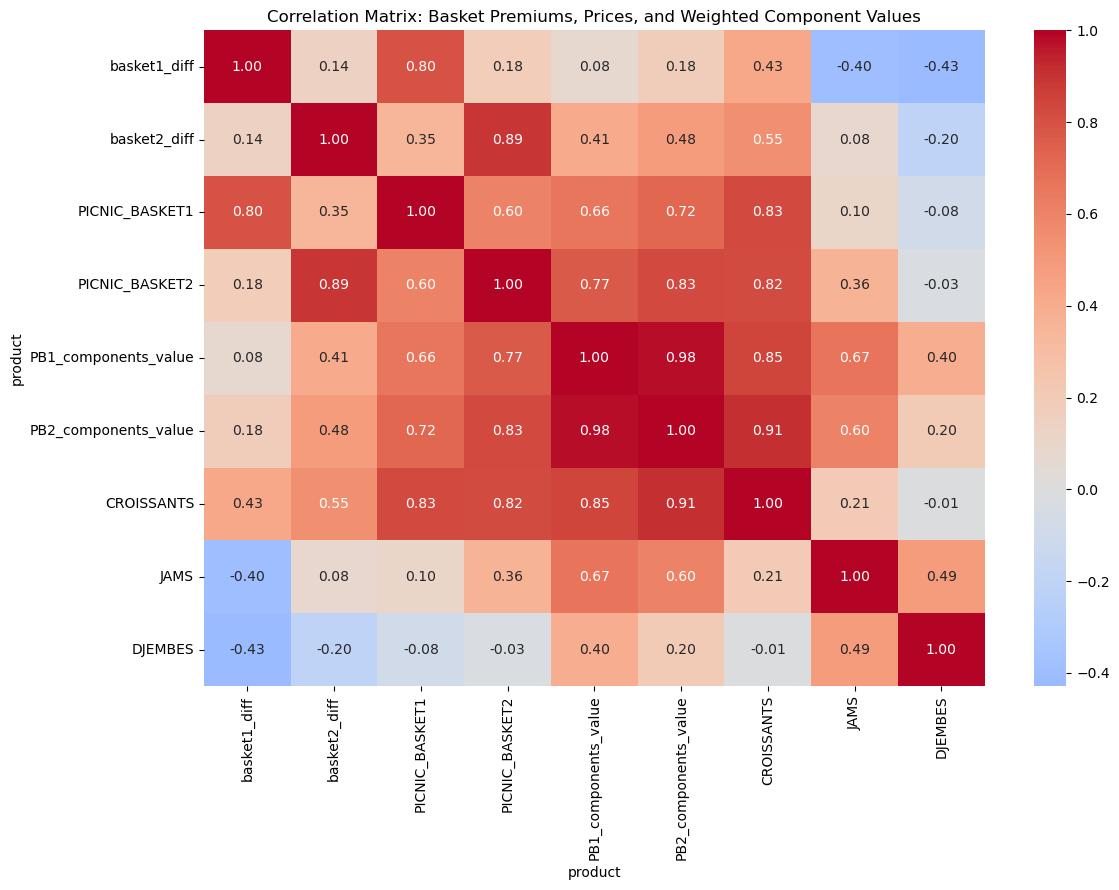

product               basket1_diff  basket2_diff  PICNIC_BASKET1  \
product                                                            
basket1_diff              1.000000      0.136870        0.800049   
basket2_diff              0.136870      1.000000        0.350737   
PICNIC_BASKET1            0.800049      0.350737        1.000000   
PICNIC_BASKET2            0.180222      0.891729        0.599201   
PB1_components_value      0.077668      0.411515        0.660261   
PB2_components_value      0.178744      0.484340        0.723602   
CROISSANTS                0.427390      0.550979        0.832070   
JAMS                     -0.395926      0.080471        0.103297   
DJEMBES                  -0.428733     -0.201579       -0.084072   

product               PICNIC_BASKET2  PB1_components_value  \
product                                                      
basket1_diff                0.180222              0.077668   
basket2_diff                0.891729              0.411515   
PIC

In [105]:
# First calculate the premiums
df_pivot['basket1_diff'] = df_pivot['PICNIC_BASKET1'] - (
    6 * df_pivot['CROISSANTS'] + 3 * df_pivot['JAMS'] + df_pivot['DJEMBES']
)

df_pivot['basket2_diff'] = df_pivot['PICNIC_BASKET2'] - (
    4 * df_pivot['CROISSANTS'] + 2 * df_pivot['JAMS']
)

# Calculate total value of components
df_pivot['PB1_components_value'] = 6 * df_pivot['CROISSANTS'] + 3 * df_pivot['JAMS'] + df_pivot['DJEMBES']
df_pivot['PB2_components_value'] = 4 * df_pivot['CROISSANTS'] + 2 * df_pivot['JAMS']

# Select relevant columns for correlation
corr_df = df_pivot[[
    'basket1_diff', 'basket2_diff',
    'PICNIC_BASKET1', 'PICNIC_BASKET2',
    'PB1_components_value', 'PB2_components_value',
    'CROISSANTS', 'JAMS', 'DJEMBES'
]]

# Compute correlation matrix
correlation_matrix = corr_df.corr()

# Display correlation matrix as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Basket Premiums, Prices, and Weighted Component Values")
plt.tight_layout()
plt.show()

# Optional: print correlation matrix
print(correlation_matrix)


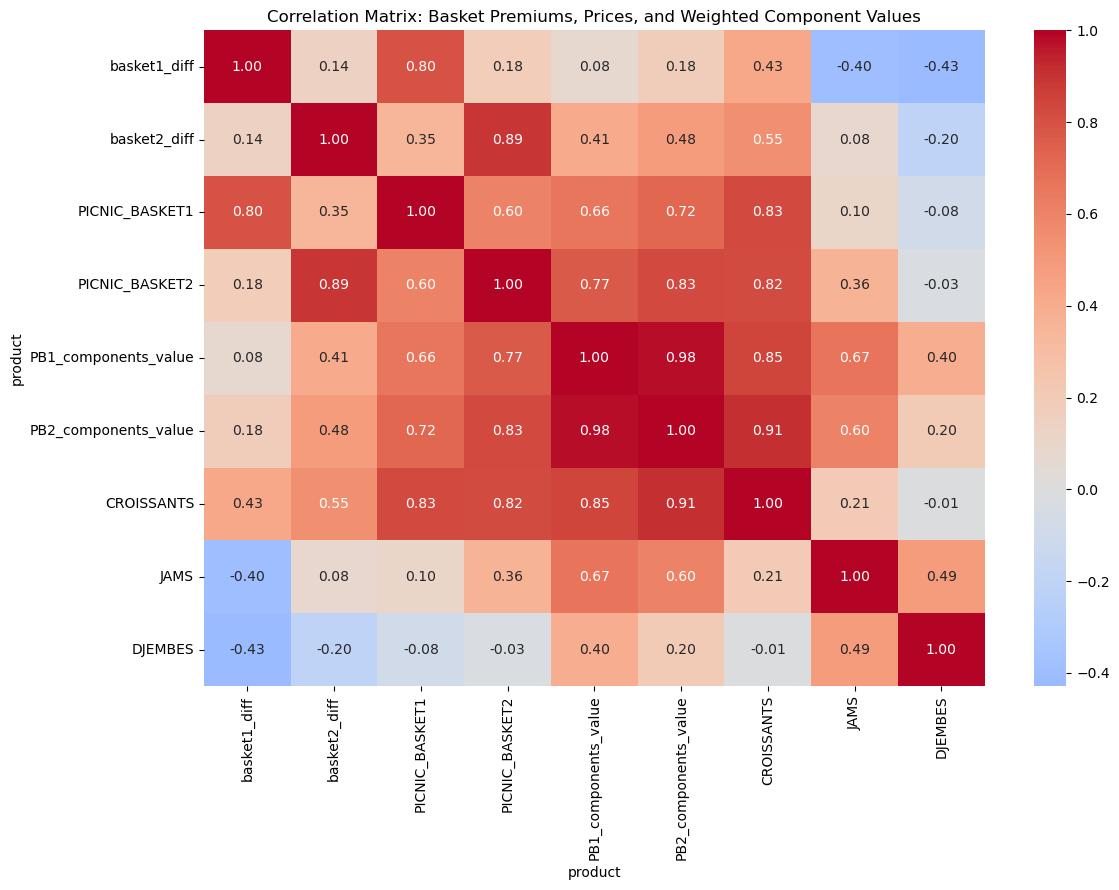

product               basket1_diff  basket2_diff  PICNIC_BASKET1  \
product                                                            
basket1_diff              1.000000      0.136870        0.800049   
basket2_diff              0.136870      1.000000        0.350737   
PICNIC_BASKET1            0.800049      0.350737        1.000000   
PICNIC_BASKET2            0.180222      0.891729        0.599201   
PB1_components_value      0.077668      0.411515        0.660261   
PB2_components_value      0.178744      0.484340        0.723602   
CROISSANTS                0.427390      0.550979        0.832070   
JAMS                     -0.395926      0.080471        0.103297   
DJEMBES                  -0.428733     -0.201579       -0.084072   

product               PICNIC_BASKET2  PB1_components_value  \
product                                                      
basket1_diff                0.180222              0.077668   
basket2_diff                0.891729              0.411515   
PIC

In [92]:
# First calculate the premiums
df_pivot['basket1_diff'] = df_pivot['PICNIC_BASKET1'] - (
    6 * df_pivot['CROISSANTS'] + 3 * df_pivot['JAMS'] + df_pivot['DJEMBES']
)

df_pivot['basket2_diff'] = df_pivot['PICNIC_BASKET2'] - (
    4 * df_pivot['CROISSANTS'] + 2 * df_pivot['JAMS']
)

# Calculate total value of components
df_pivot['PB1_components_value'] = 6 * df_pivot['CROISSANTS'] + 3 * df_pivot['JAMS'] + df_pivot['DJEMBES']
df_pivot['PB2_components_value'] = 4 * df_pivot['CROISSANTS'] + 2 * df_pivot['JAMS']

# Select relevant columns for correlation
corr_df = df_pivot[[
    'basket1_diff', 'basket2_diff',
    'PICNIC_BASKET1', 'PICNIC_BASKET2',
    'PB1_components_value', 'PB2_components_value',
    'CROISSANTS', 'JAMS', 'DJEMBES'
]]

# Compute correlation matrix
correlation_matrix = corr_df.corr()

# Display correlation matrix as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Basket Premiums, Prices, and Weighted Component Values")
plt.tight_layout()
plt.show()

# Optional: print correlation matrix
print(correlation_matrix)


In [1]:
import matplotlib.pyplot as plt

# Calculate ratio if not done already
df_pivot['PB_ratio'] = df_pivot['PB1_components_value'] / df_pivot['PB2_components_value']

# Compute mean and std
mean_ratio = df_pivot['PB_ratio'].mean()
std_ratio = df_pivot['PB_ratio'].std()

# Plot with zoomed y-axis
plt.figure(figsize=(14, 5))
plt.plot(df_pivot.index, df_pivot['PB_ratio'], label='PB1_components_value / PB2_components_value', color='teal')
plt.axhline(mean_ratio, linestyle='--', color='gray', label=f'Mean = {mean_ratio:.4f}')
plt.axhline(mean_ratio + std_ratio, linestyle='--', color='green', label='+1 Std Dev')
plt.axhline(mean_ratio - std_ratio, linestyle='--', color='red', label='-1 Std Dev')

# Zoom y-axis range
plt.ylim(mean_ratio - 2 * std_ratio, mean_ratio + 2 * std_ratio)

plt.title("Zoomed Ratio of PB1 Components to PB2 Components")
plt.xlabel("Time")
plt.ylabel("Component Ratio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'df_pivot' is not defined